 House Price Prediction Data Preprocessing and feature engineering -


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

Overview of the two datasets

In [4]:
train_data.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
count,1460.000000,1460.000000,1460,1201.000000,1460.000000,1460,91,1460,1460,1460,...,1460.000000,7,281,54,1460.000000,1460.000000,1460.000000,1460,1460,1460.000000
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,2,...,NaN,3,4,4,NaN,NaN,NaN,9,6,NaN
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,Gd,MnPrv,Shed,NaN,NaN,NaN,WD,Normal,NaN
freq,NaN,NaN,1151,NaN,NaN,1454,50,925,1311,1459,...,NaN,3,157,49,NaN,NaN,NaN,1267,1198,NaN
mean,730.500000,56.897260,NaN,70.049958,10516.828082,NaN,NaN,NaN,NaN,NaN,...,2.758904,NaN,NaN,NaN,43.489041,6.321918,2007.815753,NaN,NaN,180921.195890
std,421.610009,42.300571,NaN,24.284752,9981.264932,NaN,NaN,NaN,NaN,NaN,...,40.177307,NaN,NaN,NaN,496.123024,2.703626,1.328095,NaN,NaN,79442.502883
min,1.000000,20.000000,NaN,21.000000,1300.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN,34900.000000
25%,365.750000,20.000000,NaN,59.000000,7553.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,5.000000,2007.000000,NaN,NaN,129975.000000
50%,730.500000,50.000000,NaN,69.000000,9478.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN,163000.000000
75%,1095.250000,70.000000,NaN,80.000000,11601.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN,214000.000000


In [5]:
test_data.describe(include = 'all')

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
count,1459.000000,1459.000000,1455,1232.000000,1459.000000,1459,107,1459,1459,1457,...,1459.000000,1459.000000,3,290,51,1459.000000,1459.000000,1459.000000,1458,1459
unique,NaN,NaN,5,NaN,NaN,2,2,4,4,1,...,NaN,NaN,2,4,3,NaN,NaN,NaN,9,6
top,NaN,NaN,RL,NaN,NaN,Pave,Grvl,Reg,Lvl,AllPub,...,NaN,NaN,Ex,MnPrv,Shed,NaN,NaN,NaN,WD,Normal
freq,NaN,NaN,1114,NaN,NaN,1453,70,934,1311,1457,...,NaN,NaN,2,172,46,NaN,NaN,NaN,1258,1204
mean,2190.000000,57.378341,NaN,68.580357,9819.161069,NaN,NaN,NaN,NaN,NaN,...,17.064428,1.744345,NaN,NaN,NaN,58.167923,6.104181,2007.769705,NaN,NaN
std,421.321334,42.746880,NaN,22.376841,4955.517327,NaN,NaN,NaN,NaN,NaN,...,56.609763,30.491646,NaN,NaN,NaN,630.806978,2.722432,1.301740,NaN,NaN
min,1461.000000,20.000000,NaN,21.000000,1470.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,1.000000,2006.000000,NaN,NaN
25%,1825.500000,20.000000,NaN,58.000000,7391.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,4.000000,2007.000000,NaN,NaN
50%,2190.000000,50.000000,NaN,67.000000,9399.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,6.000000,2008.000000,NaN,NaN
75%,2554.500000,70.000000,NaN,80.000000,11517.500000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,NaN,NaN,0.000000,8.000000,2009.000000,NaN,NaN


Checking columns and it's datatypes for both datasets

In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1459 entries, 0 to 1458
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1459 non-null   int64  
 1   MSSubClass     1459 non-null   int64  
 2   MSZoning       1455 non-null   object 
 3   LotFrontage    1232 non-null   float64
 4   LotArea        1459 non-null   int64  
 5   Street         1459 non-null   object 
 6   Alley          107 non-null    object 
 7   LotShape       1459 non-null   object 
 8   LandContour    1459 non-null   object 
 9   Utilities      1457 non-null   object 
 10  LotConfig      1459 non-null   object 
 11  LandSlope      1459 non-null   object 
 12  Neighborhood   1459 non-null   object 
 13  Condition1     1459 non-null   object 
 14  Condition2     1459 non-null   object 
 15  BldgType       1459 non-null   object 
 16  HouseStyle     1459 non-null   object 
 17  OverallQual    1459 non-null   int64  
 18  OverallC

In [8]:
na_values = train_data.isna().sum().to_frame(name='NA Count').reset_index()
na_values = na_values[na_values['NA Count'] > 0 ].reset_index(drop = True)
na_values.head()

,index,NA Count
0,LotFrontage,259
1,Alley,1369
2,MasVnrType,872
3,MasVnrArea,8
4,BsmtQual,37


In [9]:
na_count = na_values['NA Count'].values.astype('int')
na_percentage = []
for count in na_count:
    pctg = (count / len(train_data)) * 100
    na_percentage.append(pctg.round(2))
na_values['NA Percentage'] = na_percentage
na_values.head()

,index,NA Count,NA Percentage
0,LotFrontage,259,17.74
1,Alley,1369,93.77
2,MasVnrType,872,59.73
3,MasVnrArea,8,0.55
4,BsmtQual,37,2.53


In [10]:
# finding columns where null values are more then 20% and then removing those columns from the train_df
columns_to_remove = na_values[na_values['NA Percentage'] > 20]
columns_to_remove

,index,NA Count,NA Percentage
1,Alley,1369,93.77
2,MasVnrType,872,59.73
10,FireplaceQu,690,47.26
16,PoolQC,1453,99.52
17,Fence,1179,80.75
18,MiscFeature,1406,96.30


In [11]:
columns_remove = columns_to_remove['index'].values.astype('str')
columns_remove

array(['Alley', 'MasVnrType', 'FireplaceQu', 'PoolQC', 'Fence',
       'MiscFeature'], dtype='<U11')

In [12]:
# train_data
for col in columns_remove:
    train_data = train_data.drop(col, axis = 1)


In [13]:
# non_numeric_columns_train and numeric_columns_train
non_numeric_columns_train = train_data.select_dtypes(include = ['object']).columns
numeric_columns_train = train_data.select_dtypes(exclude = ['object']).columns


In [14]:
train_data[numeric_columns_train] = train_data[numeric_columns_train].fillna(train_data[numeric_columns_train].median())
train_data[non_numeric_columns_train] = train_data[non_numeric_columns_train].fillna(train_data.mode())
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [15]:
# test_data
for col in columns_remove:
    test_data = test_data.drop(col, axis = 1)

In [16]:
na_values = test_data.isna().sum().to_frame(name='NA Count').reset_index()
na_values = na_values[na_values['NA Count'] > 0 ].reset_index(drop = True)
na_values.head()

,index,NA Count
0,MSZoning,4
1,LotFrontage,227
2,Utilities,2
3,Exterior1st,1
4,Exterior2nd,1


In [17]:
na_count = na_values['NA Count'].values.astype('int')
na_percentage = []
for count in na_count:
    pctg = (count / len(test_data)) * 100
    na_percentage.append(pctg.round(2))
na_values['NA Percentage'] = na_percentage
na_values

,index,NA Count,NA Percentage
0,MSZoning,4,0.27
1,LotFrontage,227,15.56
2,Utilities,2,0.14
3,Exterior1st,1,0.07
4,Exterior2nd,1,0.07
5,MasVnrArea,15,1.03
6,BsmtQual,44,3.02
7,BsmtCond,45,3.08
8,BsmtExposure,44,3.02
9,BsmtFinType1,42,2.88


In [18]:
# non_numeric_columns_test and numeric_columns_test
non_numeric_columns_test = test_data.select_dtypes(include = ['object']).columns
numeric_columns_test = test_data.select_dtypes(exclude = ['object']).columns


In [19]:
test_data[numeric_columns_test] = test_data[numeric_columns_test].fillna(test_data[numeric_columns_test].median())
test_data[non_numeric_columns_train] = test_data[non_numeric_columns_test].fillna(test_data.mode())
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,Reg,Lvl,AllPub,Inside,...,0,0,0,120,0,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,IR1,Lvl,AllPub,Corner,...,36,0,0,0,0,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,IR1,Lvl,AllPub,Inside,...,34,0,0,0,0,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,IR1,Lvl,AllPub,Inside,...,36,0,0,0,0,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,IR1,HLS,AllPub,Inside,...,82,0,0,144,0,0,1,2010,WD,Normal


Converting Non Numeric columns into numeric columns by combining the test and train data to transform the string values into numeric values


In [20]:
from sklearn.preprocessing import LabelEncoder
from sklearn.compose import ColumnTransformer

non_numeric_columns_train = train_data.select_dtypes(include=['object']).columns
non_numeric_columns_test = test_data.select_dtypes(include=['object']).columns

le = LabelEncoder()
for column in non_numeric_columns_train:
    temp_data = np.concatenate([train_data[column].values, test_data[column].values])
    le.fit(temp_data)
    train_data[column] = le.transform(train_data[column])
    test_data[column] = le.transform(test_data[column])


In [21]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,65.0,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.0,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.0,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.0,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.0,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000


In [22]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,2,80.0,11622,1,3,3,0,4,...,0,0,0,120,0,0,6,2010,8,4
1,1462,20,3,81.0,14267,1,0,3,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,1463,60,3,74.0,13830,1,0,3,0,4,...,34,0,0,0,0,0,3,2010,8,4
3,1464,60,3,78.0,9978,1,0,3,0,4,...,36,0,0,0,0,0,6,2010,8,4
4,1465,120,3,43.0,5005,1,0,1,0,4,...,82,0,0,144,0,0,1,2010,8,4


C:\Users\KIIT\AppData\Local\Temp\ipykernel_9696\4115204758.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(prices, bins=150, hist_kws={'alpha': 0.5})


<Axes: ylabel='Density'>

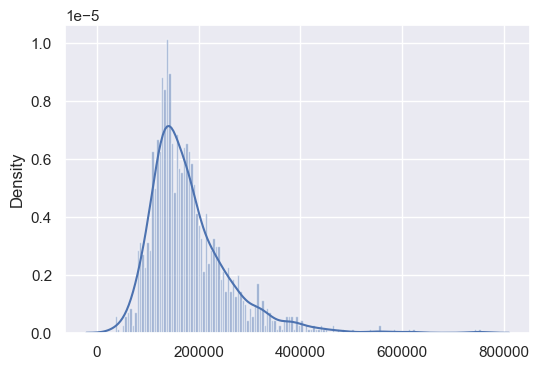

In [23]:
prices = train_data['SalePrice'].values

plt.figure(figsize=(6, 4))
sns.distplot(prices, bins=150, hist_kws={'alpha': 0.5})

In [24]:
train_df = train_data.copy()
test_df = test_data.copy()

Dropping the ID column from both datasetsas it is not necessary

In [25]:
train_df = train_df.drop('Id', axis = 1)
test_df = test_df.drop('Id', axis = 1)

Splitting the train dataset into two parts for training and validating

In [26]:
len(train_df)
valid_size = int(0.8*len(train_df))
valid_size

1168

In [27]:
from sklearn.utils import shuffle

train_df = shuffle(train_df).reset_index(drop=True)

In [28]:
valid_df = train_df.iloc[valid_size:].reset_index(drop=True)
valid_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,3,89.0,11645,1,0,3,0,0,0,...,0,0,0,0,0,8,2006,8,4,196500
1,20,3,80.0,9600,1,3,3,0,2,0,...,0,0,0,0,0,5,2007,8,4,181500
2,60,3,90.0,11700,1,3,3,0,4,0,...,0,0,0,0,0,6,2007,8,4,175000
3,120,4,69.0,4435,1,3,3,0,4,0,...,0,0,0,0,0,5,2009,8,4,140000
4,20,3,62.0,70761,1,0,2,0,4,1,...,0,0,0,0,0,12,2006,8,4,280000


In [29]:
train_df = train_df.iloc[:valid_size].reset_index(drop=True)
train_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,20,3,71.0,8197,1,3,3,0,4,0,...,0,0,0,0,0,4,2007,8,4,143500
1,20,3,57.0,9764,1,0,3,0,2,0,...,0,0,0,0,0,5,2008,8,4,130000
2,85,3,69.0,12122,1,0,3,0,0,0,...,0,0,0,0,0,7,2008,8,4,178400
3,90,3,60.0,7200,1,3,3,0,4,0,...,0,0,0,0,0,6,2009,8,4,90000
4,160,1,24.0,2280,1,3,3,0,4,0,...,0,0,0,0,0,8,2008,8,4,179400


Splitting data into variables as features and targets for training and validating

In [30]:
x_train = train_df.drop('SalePrice', axis = 1)
y_train = train_df['SalePrice']

x_val = valid_df.drop('SalePrice', axis = 1)
y_val = valid_df['SalePrice']

In [31]:
print(x_train.shape)
print(y_train.shape)
print(x_val.shape)
print(y_val.shape)

(1168, 73)
(1168,)
(292, 73)
(292,)


**Feature Selection**

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
rf.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
importances = rf.feature_importances_
feature_names = x_train.columns
feature_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})

# Rank features by importance
feature_importance = feature_importance.sort_values(by='Importance', ascending=False).reset_index(drop = True)
feature_importance.head(10)

,Feature,Importance
0,LotArea,0.038573
1,GrLivArea,0.037513
2,1stFlrSF,0.037435
3,GarageArea,0.036934
4,BsmtUnfSF,0.036306
5,TotalBsmtSF,0.034220
6,LotFrontage,0.033398
7,GarageYrBlt,0.031809
8,YearBuilt,0.031354
9,YearRemodAdd,0.031019


**Feature Importance using Select KBest with F-Test**

In [34]:
from sklearn.feature_selection import SelectKBest, f_classif

best_features = SelectKBest(score_func = f_classif, k = 10)
fit = best_features.fit(x_train, y_train)

In [36]:
#We Get the scores of the features
feature_scores = pd.DataFrame({'Feature': feature_names, 'Score': fit.scores_})
feature_scores = feature_scores.sort_values(by='Score', ascending=False).reset_index(drop = True)
feature_scores.head(10)

,Feature,Score
0,OverallQual,5.229750
1,MiscVal,3.348542
2,ExterQual,3.216656
3,GrLivArea,3.193268
4,LotArea,3.160070
5,BsmtQual,2.837928
6,GarageCars,2.776771
7,KitchenQual,2.571415
8,FullBath,2.439447
9,GarageArea,2.378671


In [37]:
fi_columns = feature_importance['Feature'].values
fi_importances = feature_importance['Importance'].values
fi_threshold = feature_importance['Importance'].median()
selected_fi_features = []

for i in range(len(feature_importance)):
    if fi_importances[i] >= fi_threshold:
        selected_fi_features.append(fi_columns[i])

fs_columns = feature_scores['Feature'].values
f_scores = feature_scores['Score'].values
fs_threshold = feature_scores['Score'].median()
selected_fs_features = []

for i in range(len(feature_scores)):
    if f_scores[i] >= fs_threshold:
        selected_fs_features.append(fs_columns[i])

print(len(selected_fi_features))
print(len(selected_fs_features))

37
37


In [38]:
if len(selected_fs_features) > len(selected_fi_features):
    features_range = len(selected_fi_features)
else:
    features_range = len(selected_fs_features)
features_range

37

In [39]:
columns_selected = []

for i in range(features_range):
    if selected_fs_features[i] not in selected_fi_features:
        continue
    else:
        columns_selected.append(fs_columns[i])
columns_selected

['OverallQual',
 'GrLivArea',
 'LotArea',
 'BsmtQual',
 'KitchenQual',
 'GarageArea',
 '1stFlrSF',
 'GarageFinish',
 'YearBuilt',
 'TotalBsmtSF',
 'MasVnrArea',
 'TotRmsAbvGrd',
 '2ndFlrSF',
 'GarageYrBlt',
 'Fireplaces',
 'YearRemodAdd',
 'BsmtFinSF1',
 'BsmtUnfSF',
 'OpenPorchSF',
 'WoodDeckSF',
 'BsmtExposure',
 'LotShape',
 'BedroomAbvGr',
 'HeatingQC']

In [40]:
len(columns_selected)

24

**Model Training using Random Forest**

In [41]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

rf = RandomForestRegressor()

param_grid_rf = {
    'n_estimators': [100, 200, 300, 400],
    'max_depth': [5, 10, 15, 20]
}

grid_search_rf = GridSearchCV(rf, param_grid = param_grid_rf, cv = 5)
grid_search_rf.fit(x_train, y_train)

best_model_rf = grid_search_rf.best_estimator_
best_params_rf = grid_search_rf.best_params_

predictions_rf = best_model_rf.predict(x_val)

In [42]:
best_params_rf

{'max_depth': 20, 'n_estimators': 100}

In [55]:
metrics.mean_absolute_error(y_val, predictions_rf)

np.float64(17936.20414805558)

In [56]:
metrics.mean_squared_error(y_val, predictions_rf)

np.float64(892724036.5506545)

In [57]:
rf_score = metrics.r2_score(y_val, predictions_rf)
rf_score

0.8712913468690837

**Model Training using Decision Tree**

In [58]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor()
param_grid_dt = {'max_depth': [5, 10, 15, 20, 25]}

grid_search_dt = GridSearchCV(dt, param_grid = param_grid_dt, cv = 5)
grid_search_dt.fit(x_train, y_train)

best_model_dt = grid_search_dt.best_estimator_
best_params_dt = grid_search_dt.best_params_

predictions_dt = best_model_dt.predict(x_val)

In [59]:
best_params_dt

{'max_depth': 5}

In [61]:
metrics.mean_absolute_error(y_val, predictions_dt)

np.float64(28952.108726185008)

In [62]:
metrics.mean_squared_error(y_val, predictions_dt)

np.float64(1687683043.369699)

In [63]:
dt_score = metrics.r2_score(y_val, predictions_dt)
dt_score

0.75667798498705

In [66]:
test_df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,2,80.0,11622,1,3,3,0,4,0,...,0,0,0,120,0,0,6,2010,8,4
1,20,3,81.0,14267,1,0,3,0,0,0,...,36,0,0,0,0,12500,6,2010,8,4
2,60,3,74.0,13830,1,0,3,0,4,0,...,34,0,0,0,0,0,3,2010,8,4
3,60,3,78.0,9978,1,0,3,0,4,0,...,36,0,0,0,0,0,6,2010,8,4
4,120,3,43.0,5005,1,0,1,0,4,0,...,82,0,0,144,0,0,1,2010,8,4
